    Instrumento financiero: Acciones de Apple (AAPL)

    Modelo usado para la clasificación: Support Vector Clasifier (SVC) 


# Importación de librerías

In [ ]:
import pandas as pd #trabajar con el dataframe
import numpy as np
import yfinance as yf #extraer información del instrumento financiero
from sklearn.svm import SVC #Modelo Support Vector Classifier
from sklearn.model_selection import train_test_split #dividir dataset en entrenamiento y prueba
from sklearn.metrics import classification_report, confusion_matrix #Evaluacion del modelo
import matplotlib.pyplot as plt #Visualizaciones

# Extracción de datos

In [ ]:
#Datos históricos en determinado rango (5años)
apple_df = yf.download('AAPL', start='2018-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed


Información del dataframe

In [ ]:
apple_df.info()
#variables numéricas, no contienen nulos

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
display(apple_df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010124,85438400


# Análisis exploratorio de datos

In [ ]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,98.028503,99.217804,96.881497,98.092897,96.024541,1.168806e+08
std,46.302471,46.894754,45.688159,46.309891,46.294215,5.504461e+07
min,35.994999,36.430000,35.500000,35.547501,34.029236,3.519590e+07
25%,50.956249,51.448750,50.573750,51.022501,49.103737,8.014245e+07
50%,91.279999,92.970001,90.910004,91.632500,89.489700,1.023002e+08
75%,142.760002,144.474998,141.004997,142.864998,141.005432,1.372052e+08
max,182.630005,182.940002,179.119995,182.009995,179.481110,4.265100e+08


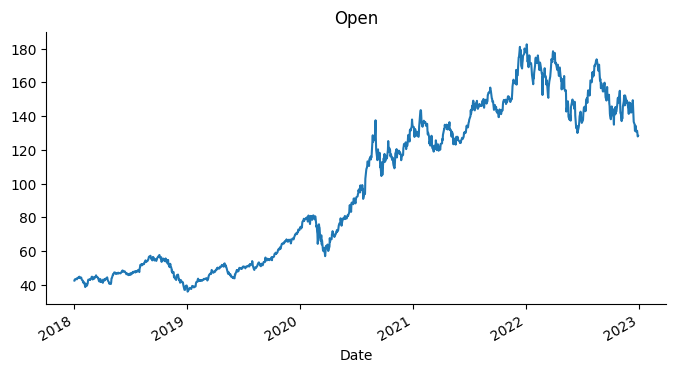

In [ ]:
# Variacion en el tiempo del precio de apertura (open)
apple_df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

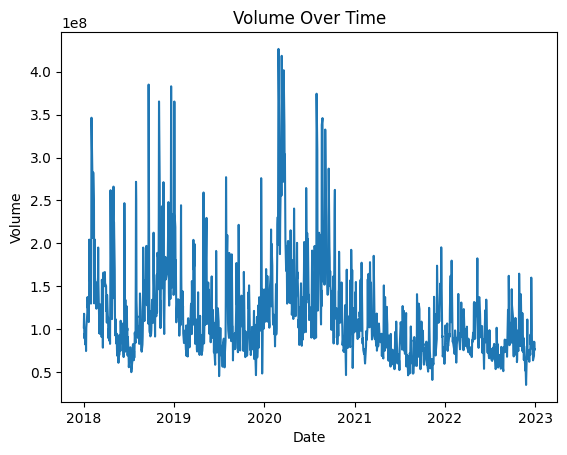

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variacion del volumen (Volume) en el tiempo (escala = e8)
sns.lineplot(data=apple_df, x="Date", y="Volume")
plt.title("Volume Over Time")
plt.show()

# Preprocesamiento

Como el dataframe no contiene nulos procedemos a la creación de nuevas variables

In [ ]:
#Rango de la vela
apple_df['Open-Close'] = apple_df.Open - apple_df.Close
apple_df.sample(3)

,Open,High,Low,Close,Adj Close,Volume,Open-Close
Date,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461613,109560400,0.012501
2020-07-10,95.334999,95.980003,94.705002,95.919998,93.676933,90257200,-0.584999
2019-05-01,52.470001,53.827499,52.307499,52.630001,50.598206,259309200,-0.160000


In [ ]:
#Rango de las agujas
apple_df['High-Low'] = apple_df.High - apple_df.Low
apple_df.sample(3)

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2021-03-17,124.050003,125.860001,122.339996,124.760002,122.455490,111932600,-0.709999,3.520004
2020-05-01,71.562500,74.750000,71.462502,72.267502,70.387001,240616800,-0.705002,3.287498
2018-11-08,52.494999,52.529999,51.687500,52.122501,49.896320,101450400,0.372498,0.842499


In [ ]:
# Retornos % Reales
# (Rendimiento porcentual diario de la accion)
apple_df['Return'] =  apple_df.Close.pct_change()
apple_df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Return
Date,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600,-0.524998,0.760002,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600,0.075001,0.647499,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,-0.122501,0.347500,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000,-0.389999,0.579998,0.011385
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200,0.000000,0.420002,-0.003714
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900,-0.940002,2.779999,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800,1.350006,2.690002,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010124,85438400,3.629997,5.159996,-0.030685


In [ ]:
#Separar variables predictoras
X = apple_df[['Open-Close', 'High-Low']]
X.sample(2)

,Open-Close,High-Low
Date,,
2018-07-23,-0.232502,0.600002
2019-07-18,-0.415001,0.545002


In [ ]:
#Variable Objetivo
#Utiliza np.where para crear una nueva matriz 0y_real' donde:
#El valor es 1 si el precio de cierre del día siguiente es mayor que el precio de cierre del día actual.
#En caso contrario, el valor es 0.
y_real = np.where(apple_df['Close'].shift(-1) > apple_df['Close'], 1, 0)

In [ ]:
#Ajuste tamaño
largo =len(y_real)-1
y_real_total = y_real[:largo]
len(y_real_total)


1258

In [ ]:
X=X.head(largo)
len(X)


1258

In [ ]:
apple_df=apple_df.head(largo)
len(apple_df)

1258

# Modelo (Entrenamiento y predección )

Separación en Entrenamiento/Prueba

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(apple_df))
split

1006

In [ ]:
# Conjunto de entremaiento
X_train_real = X[:split]
y_train_real = y_real_total[:split]

In [ ]:
# Conjunto de prueba
X_prueba_real = X[split:]
y_prueba_real = y_real_total[split:]

In [ ]:
type(X_prueba_real)

pandas.core.frame.DataFrame

In [ ]:
type(y_prueba_real)

numpy.ndarray

Modelo

In [ ]:
# Support vector classifier
Modelo_SVC = SVC()
#ENTRENAMIENTO
Modelo_SVC.fit(X_train_real,y_train_real)
# modelo entrenado

SVC()

In [ ]:
#PREDICCION
apple_df['y_pred_total'] = Modelo_SVC.predict(X)

apple_df["y_real_total"] = y_real_total
apple_df.sample(3)

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Return,y_real_total,y_pred_total,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.493862,98444800,-0.042500,0.607502,-0.006463,1,1,-0.006463,0.203628,0.203628
2021-09-22,144.449997,146.429993,143.699997,145.850006,143.613922,76404300,-1.400009,2.729996,0.016872,1,1,0.016872,1.429220,1.646785
2019-07-16,51.147499,51.527500,50.875000,51.125000,49.340595,67467200,0.022499,0.652500,-0.003460,0,1,-0.003460,0.234681,0.234681


# Evaluación del modelo y de la estratégia

In [ ]:
#Evaluacion del modelo
# Obtener las predicciones del modelo
y_true = apple_df["y_real_total"]
y_pred = apple_df["y_pred_total"]

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular y mostrar el informe de clasificación
class_report = classification_report(y_true, y_pred)
print("Informe de Clasificación:")
print(class_report)

Matriz de Confusión:
[[ 52 543]
 [ 43 620]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.55      0.09      0.15       595
           1       0.53      0.94      0.68       663

    accuracy                           0.53      1258
   macro avg       0.54      0.51      0.41      1258
weighted avg       0.54      0.53      0.43      1258



Clase 0: El modelo tiene una baja capacidad para identificar correctamente las instancias de la clase 0 (bajada del precio), como lo indica el bajo recall (0.09) y el bajo F1-score (0.15).


Clase 1: El modelo tiene una alta capacidad para identificar correctamente las instancias de la clase 1 (subida del precio), como lo indica el alto recall (0.94) y un F1-score razonable (0.68).

In [ ]:
#Calcular el retorno de la estrategia
apple_df['Strategy_Return'] = apple_df.Return * apple_df.y_pred_total.shift(1)
#Retorno acumulado real
apple_df['Cum_Ret'] = apple_df['Return'].cumsum()
#Retorno acumulado de la estrategia
apple_df['Cum_Strategy'] = apple_df['Strategy_Return'].cumsum()
apple_df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Return,y_real_total,y_pred_total,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600,-0.524998,0.760002,NaN,0,1,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600,0.075001,0.647499,-0.000174,1,1,-0.000174,-0.000174,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,-0.122501,0.347500,0.004645,1,1,0.004645,0.004471,0.004471
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000,-0.389999,0.579998,0.011385,0,1,0.011385,0.015856,0.015856
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200,0.000000,0.420002,-0.003714,0,1,-0.003714,0.012142,0.012142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,134.350006,134.559998,130.300003,132.229996,131.149551,77852100,2.120010,4.259995,-0.023773,0,1,-0.023773,1.401362,1.737342
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900,-0.940002,2.779999,-0.002798,0,1,-0.002798,1.398564,1.734544
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800,1.350006,2.690002,-0.013878,0,1,-0.013878,1.384686,1.720666


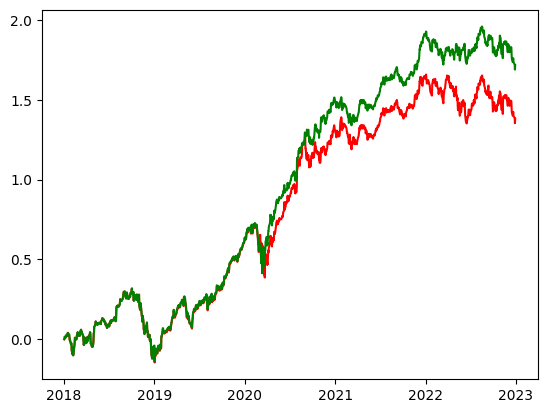

In [ ]:
#Grafica rendimientos
%matplotlib inline

plt.plot(apple_df['Cum_Ret'],color='red')
plt.plot(apple_df['Cum_Strategy'],color='green')

Se visualiza como la estrategia implementada está obteniendo ligeramente mejores retornos que la data histórica.